In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('delhi_aqi.csv')

In [8]:
print(df.head())

                  date       co     no     no2     o3    so2   pm2_5    pm10  \
0  2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
1  2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2  2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
3  2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
4  2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3  
0  28.63  
1  41.04  
2  49.14  
3  48.13  
4  46.61  


In [9]:
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [10]:
    # Convert 'date' column to datetime objects
    # This is crucial for any time-series analysis
    df['date'] = pd.to_datetime(df['date'])


In [11]:
    # Set the 'date' column as the index
    df.set_index('date', inplace=True)

In [12]:
print(df.isnull().sum())

co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [13]:
  df.fillna(method='ffill', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_17548\2204222154.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
   print(df.isnull().sum())

co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [15]:
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (15, 8)

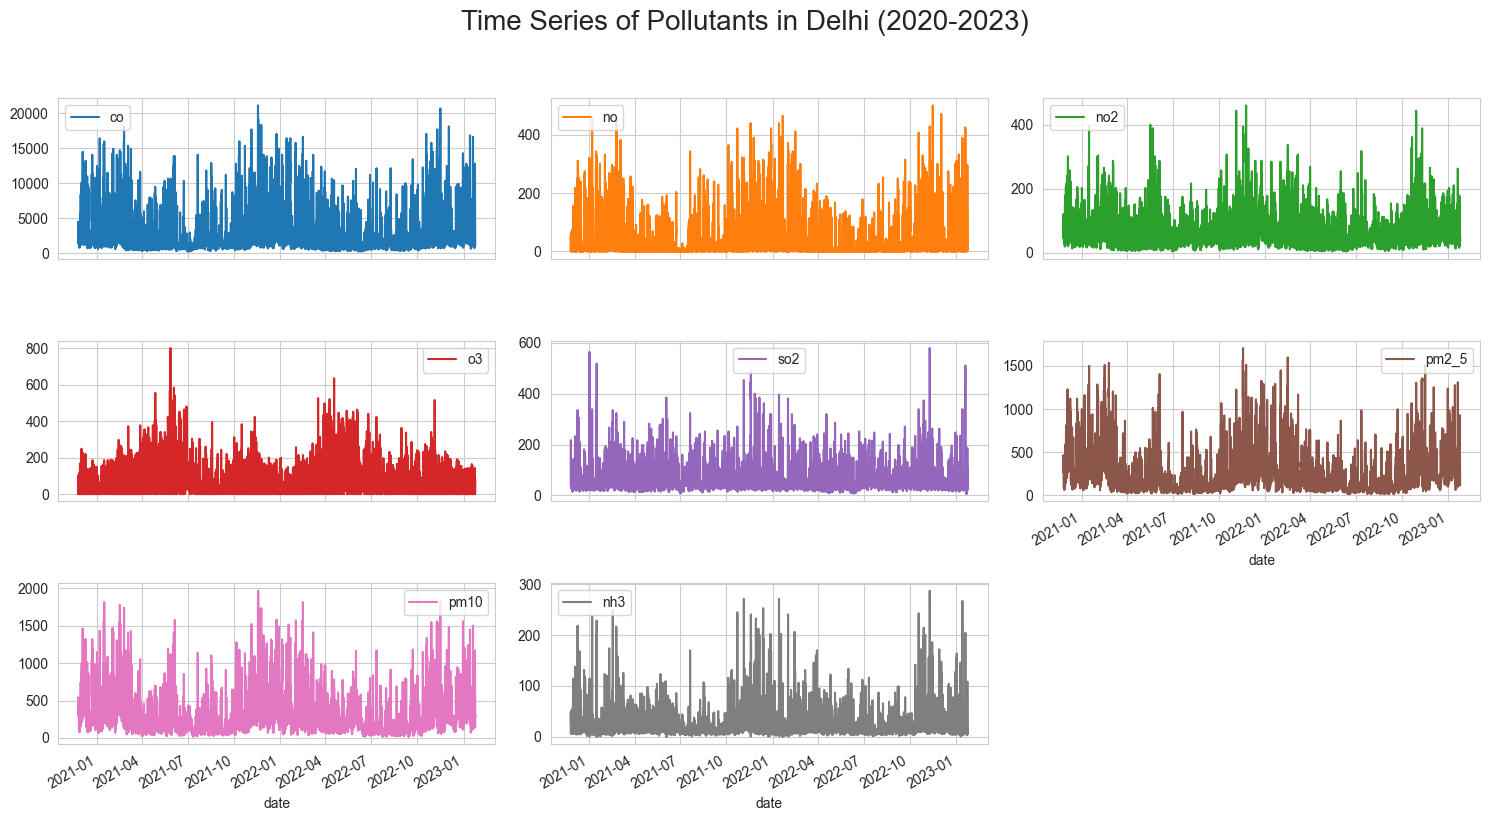

In [16]:
        df.plot(subplots=True, layout=(3, 3), title='Time Series of Pollutants in Delhi')
        plt.suptitle('Time Series of Pollutants in Delhi (2020-2023)', fontsize=20, y=1.02)
        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()

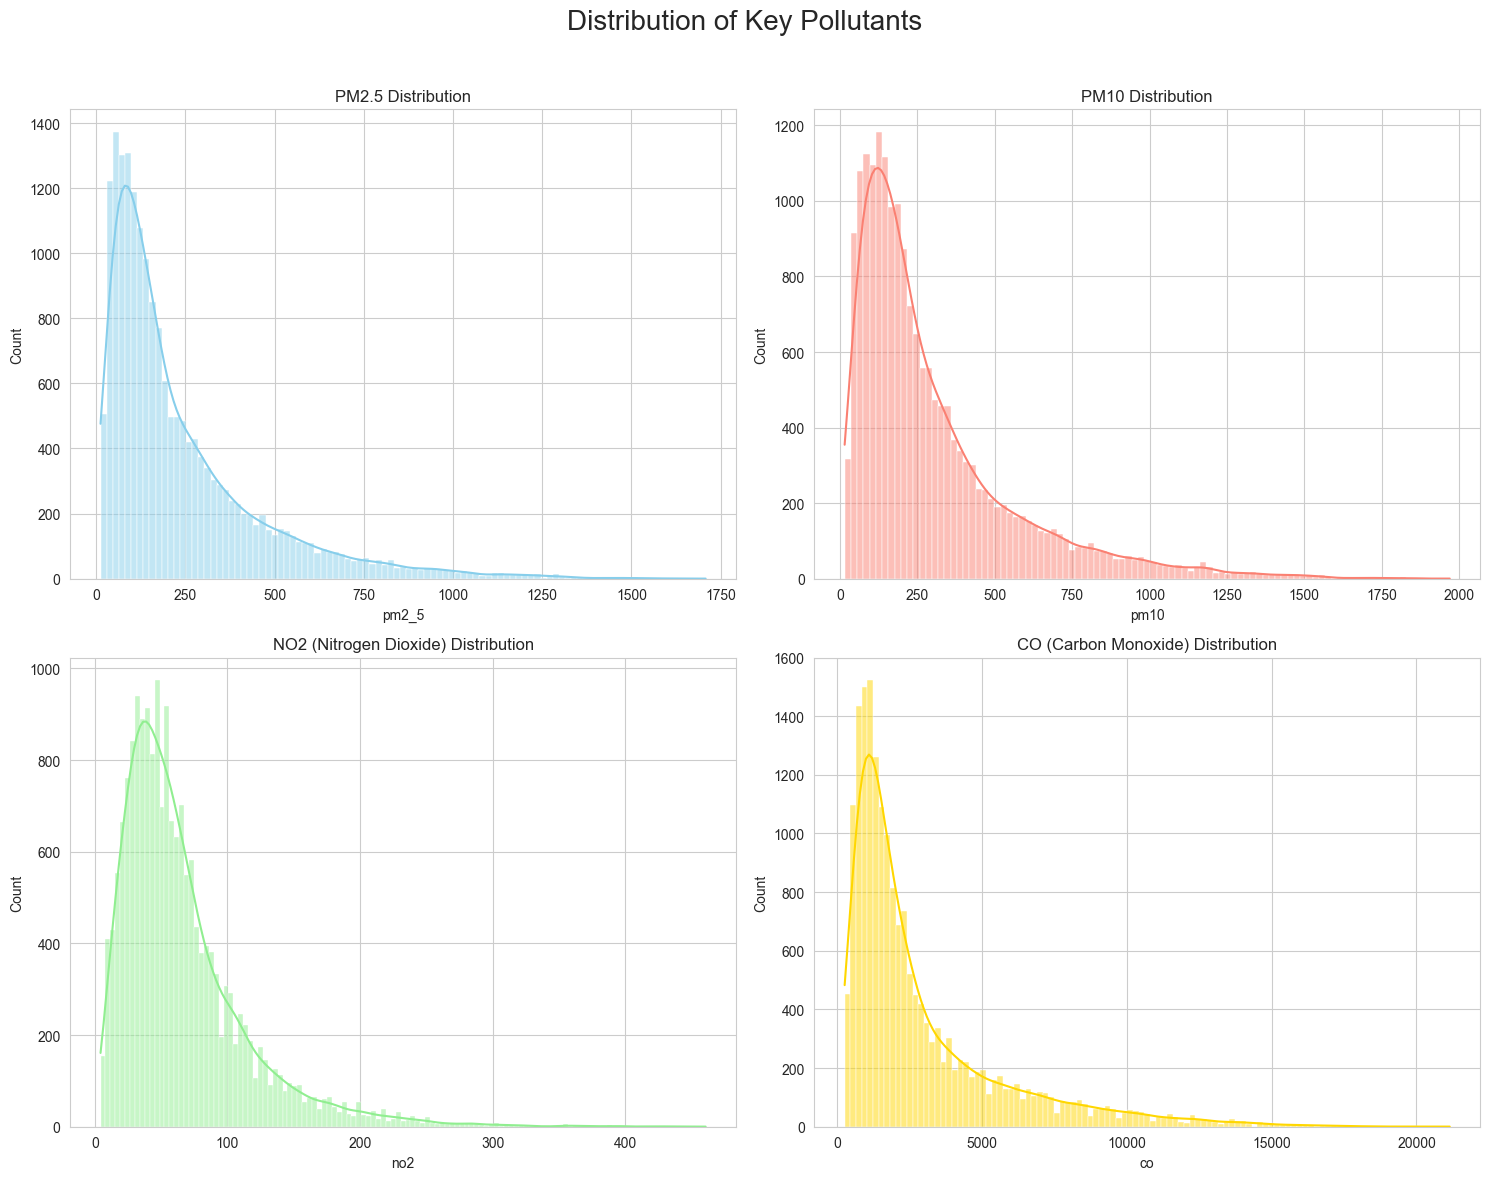

In [17]:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Distribution of Key Pollutants', fontsize=20)

        sns.histplot(df['pm2_5'], kde=True, ax=axes[0, 0], color='skyblue')
        axes[0, 0].set_title('PM2.5 Distribution')

        sns.histplot(df['pm10'], kde=True, ax=axes[0, 1], color='salmon')
        axes[0, 1].set_title('PM10 Distribution')

        sns.histplot(df['no2'], kde=True, ax=axes[1, 0], color='lightgreen')
        axes[1, 0].set_title('NO2 (Nitrogen Dioxide) Distribution')

        sns.histplot(df['co'], kde=True, ax=axes[1, 1], color='gold')
        axes[1, 1].set_title('CO (Carbon Monoxide) Distribution')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

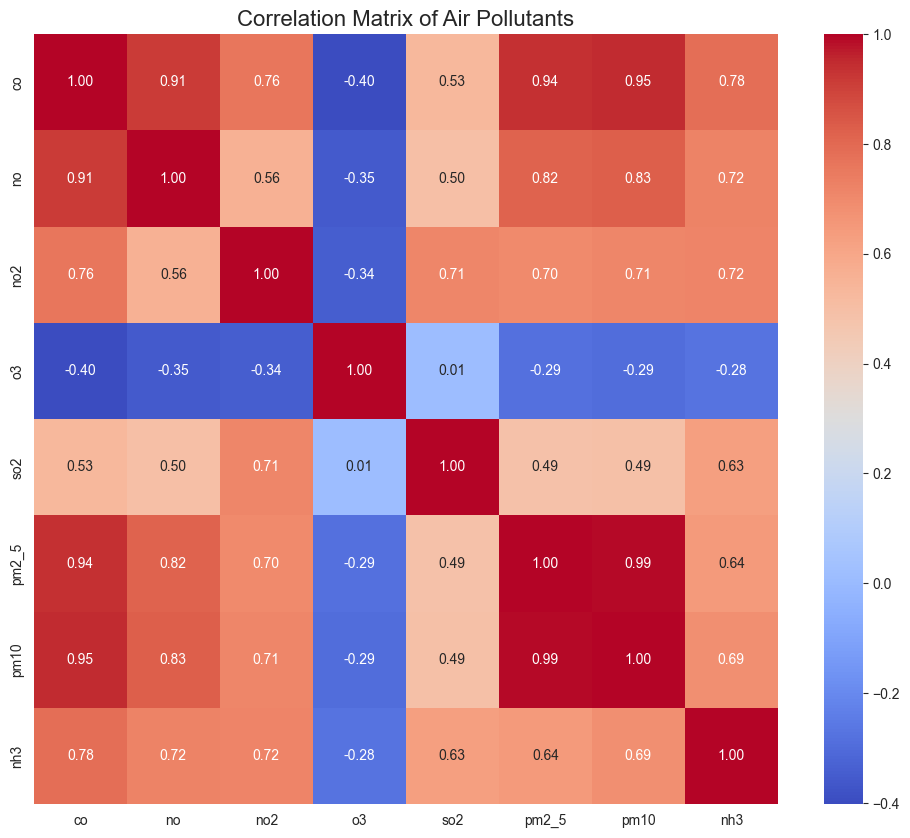

In [18]:

        correlation_matrix = df.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Air Pollutants', fontsize=16)
        plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
    df_daily = df.resample('D').mean()
    df_daily.fillna(method='ffill', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_17548\2657688508.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily.fillna(method='ffill', inplace=True)


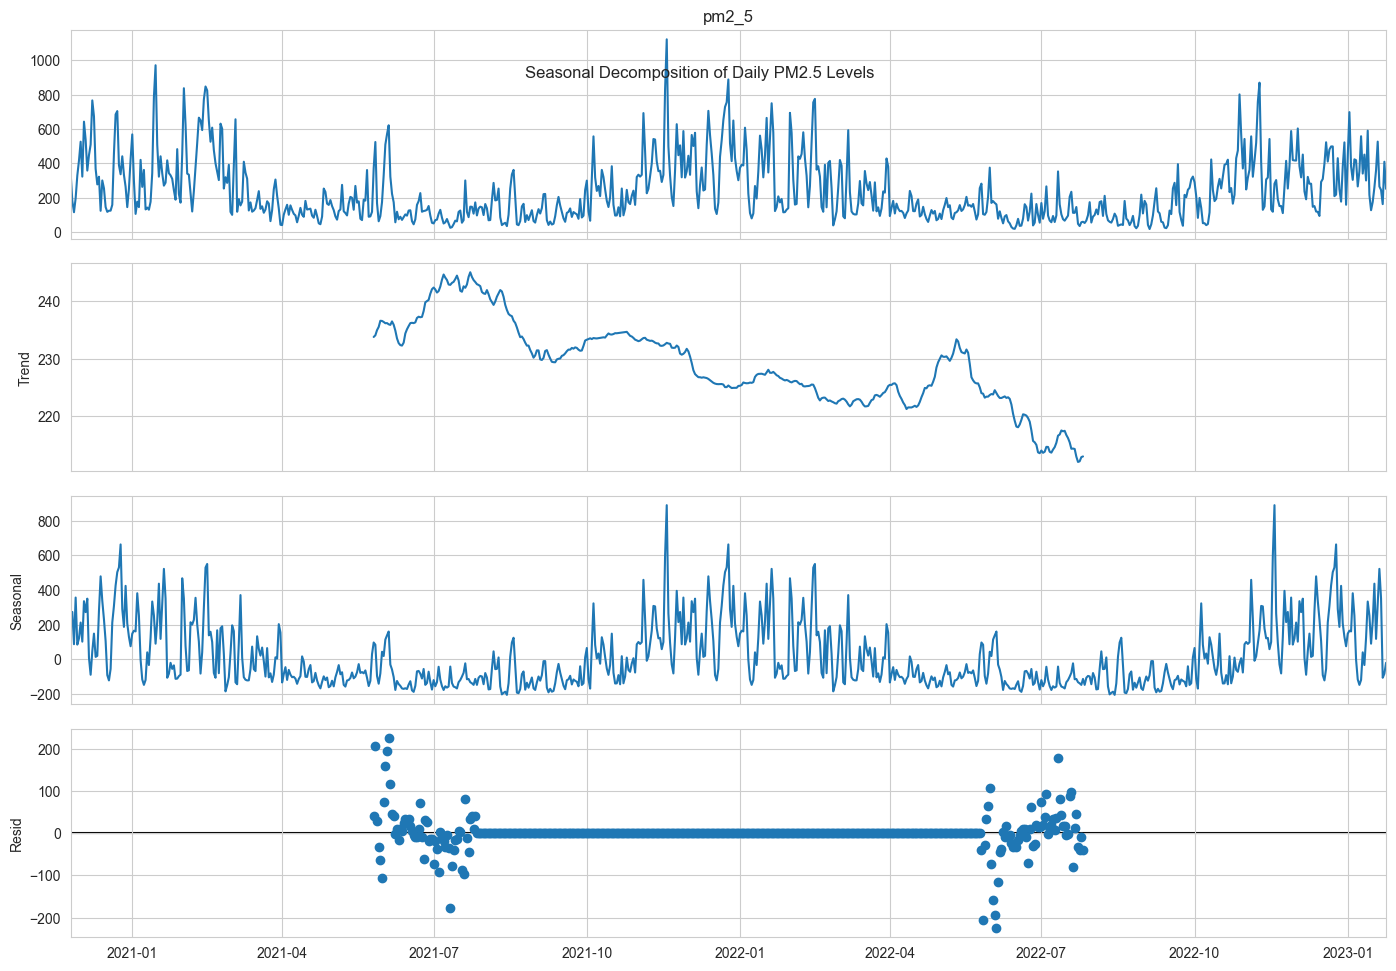

In [25]:
decomposition = seasonal_decompose(df_daily['pm2_5'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Daily PM2.5 Levels', y=0.92)
plt.show()

In [26]:
df_daily['year'] = df_daily.index.year
df_daily['month'] = df_daily.index.month
df_daily['day_of_week'] = df_daily.index.day_name()

In [27]:
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else: # 10, 11
            return 'Post-Monsoon/Autumn'

In [28]:
df_daily['season'] = df_daily['month'].apply(get_season)

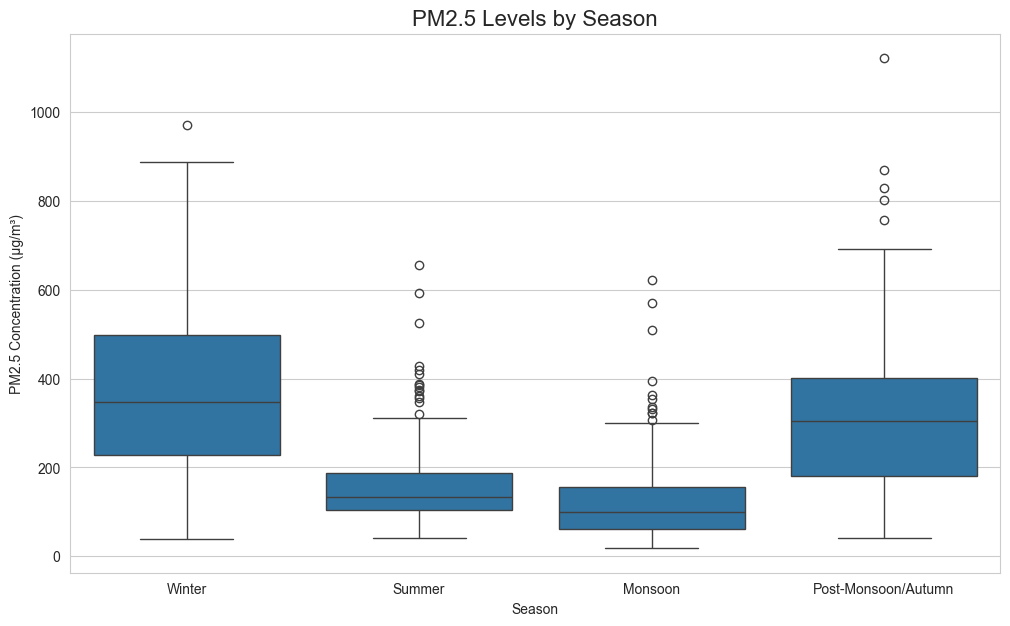

In [30]:
  plt.figure(figsize=(12, 7))
season_order = ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon/Autumn']
sns.boxplot(x='season', y='pm2_5', data=df_daily, order=season_order)
plt.title('PM2.5 Levels by Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

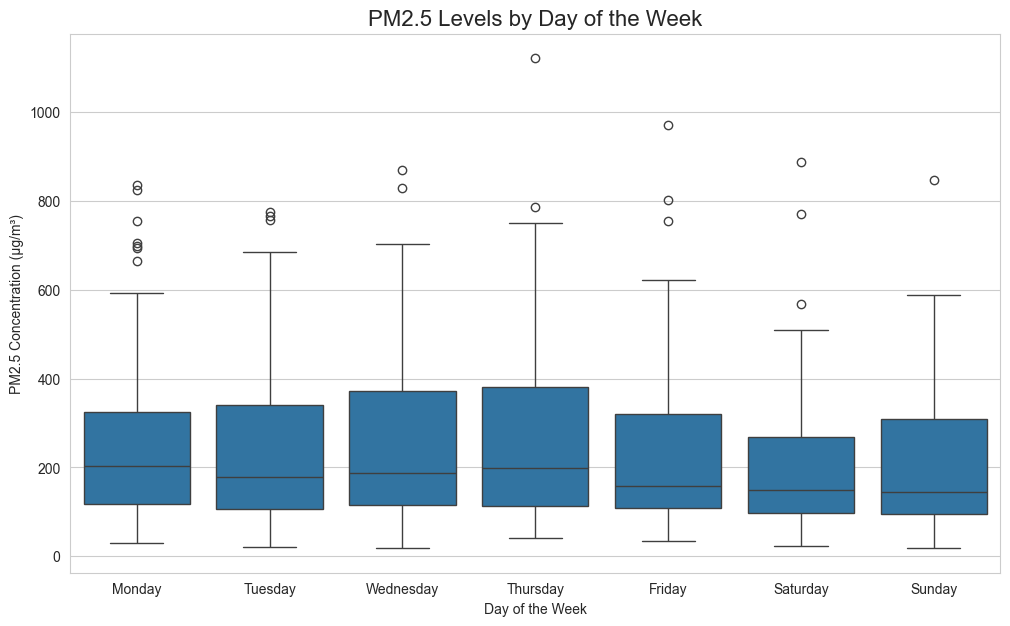

In [31]:
 plt.figure(figsize=(12, 7))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(x='day_of_week', y='pm2_5', data=df_daily, order=day_order)
plt.title('PM2.5 Levels by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
import xgboost as xgb

In [34]:
    target = 'pm2_5'
    
    # a) Time-based features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['day_of_year'] = df.index.dayofyear

In [35]:
    for i in range(1, 4): # Lags for 1, 2, 3 hours ago
        df[f'pm2_5_lag_{i}'] = df[target].shift(i)

In [36]:
  df['pm2_5_lag_24'] = df[target].shift(24)

In [38]:
df['pm2_5_rolling_mean_3'] = df[target].shift(1).rolling(window=3).mean()
df['pm2_5_rolling_mean_24'] = df[target].shift(1).rolling(window=24).mean()

In [39]:
print("\nData with new features (a few columns):")
print(df[['pm2_5', 'hour', 'pm2_5_lag_1', 'pm2_5_rolling_mean_3']].head())


Data with new features (a few columns):
                      pm2_5  hour  pm2_5_lag_1  pm2_5_rolling_mean_3
date                                                                
2020-11-25 01:00:00  364.61     1          NaN                   NaN
2020-11-25 02:00:00  420.96     2       364.61                   NaN
2020-11-25 03:00:00  463.68     3       420.96                   NaN
2020-11-25 04:00:00  454.81     4       463.68            416.416667
2020-11-25 05:00:00  448.14     5       454.81            446.483333


In [41]:
 FEATURES = [
        'co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3', # Other pollutants
        'hour', 'day_of_week', 'month', 'day_of_year', # Time features
        'pm2_5_lag_1', 'pm2_5_lag_2', 'pm2_5_lag_3', 'pm2_5_lag_24', # Lag features
        'pm2_5_rolling_mean_3', 'pm2_5_rolling_mean_24' # Rolling features
    ]
TARGET = 'pm2_5'

X = df[FEATURES]
y = df[TARGET]

In [42]:
split_fraction = 0.8
split_index = int(len(X) * split_fraction)

In [43]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [44]:
print(f"\nTrain set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")


Train set size: 15020 samples
Test set size: 3756 samples


In [45]:
reg = xgb.XGBRegressor(
        n_estimators=1000,
        max_depth=5,
        learning_rate=0.05,
        early_stopping_rounds=10,
        objective='reg:squarederror'
    )

In [46]:
 reg.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100 # Print evaluation results every 100 rounds
    )

[0]	validation_0-rmse:214.55605	validation_1-rmse:219.41451
[100]	validation_0-rmse:12.52851	validation_1-rmse:14.15308
[200]	validation_0-rmse:9.66327	validation_1-rmse:13.57833
[300]	validation_0-rmse:8.40739	validation_1-rmse:13.31733
[307]	validation_0-rmse:8.34327	validation_1-rmse:13.31277


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
predictions = reg.predict(X_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print(f"Test RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"Test MAE (Mean Absolute Error): {mae:.2f}")

Test RMSE (Root Mean Squared Error): 13.31
Test MAE (Mean Absolute Error): 8.71


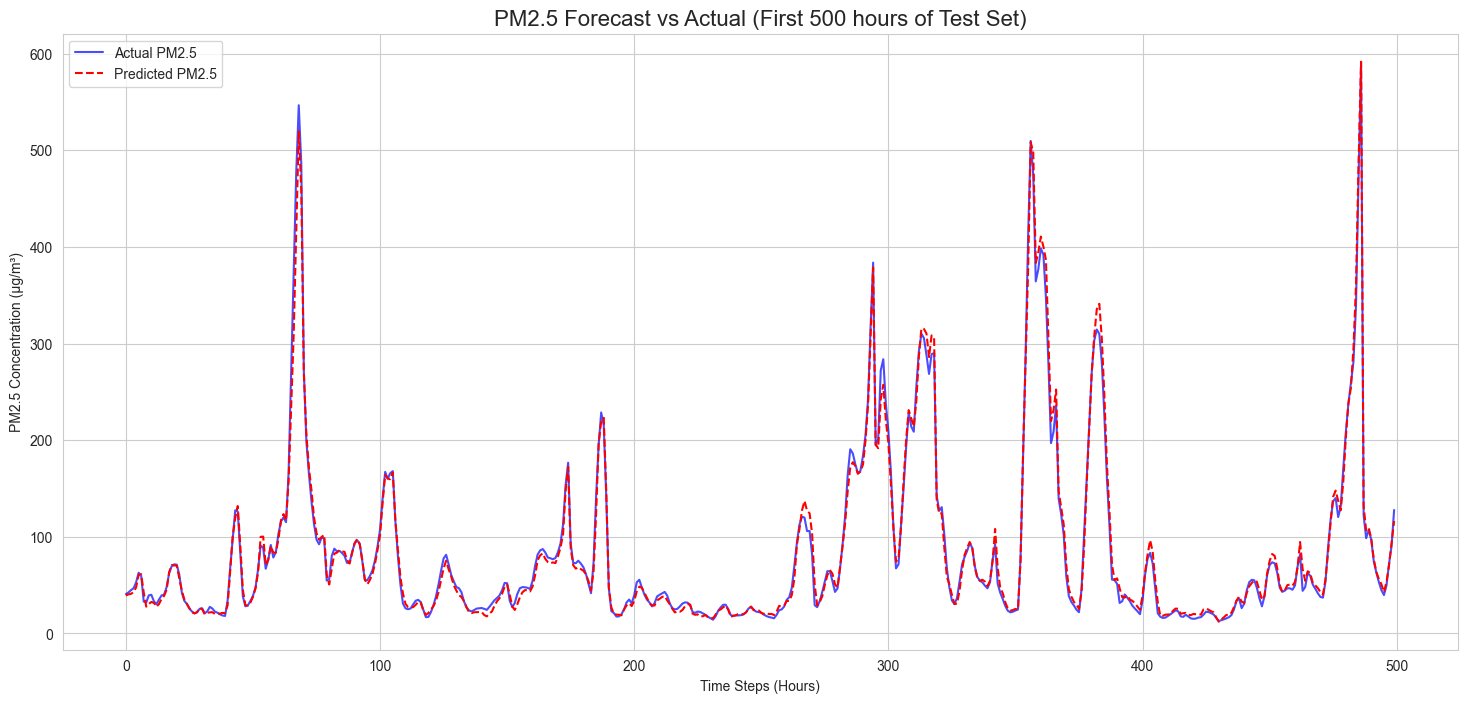

In [50]:
    plt.figure(figsize=(18, 8))
    # To make the plot clearer, we'll plot a subset of the test data
    plot_range = 500
    plt.plot(y_test.values[:plot_range], label='Actual PM2.5', color='blue', alpha=0.7)
    plt.plot(predictions[:plot_range], label='Predicted PM2.5', color='red', linestyle='--')
    plt.title(f'PM2.5 Forecast vs Actual (First {plot_range} hours of Test Set)', fontsize=16)
    plt.xlabel('Time Steps (Hours)')
    plt.ylabel('PM2.5 Concentration (µg/m³)')
    plt.legend()
    plt.show()

In [53]:
feature_importance = pd.DataFrame({
        'feature': FEATURES,
        'importance': reg.feature_importances_
    }).sort_values('importance', ascending=False)

In [52]:
print(feature_importance.head(10))

                  feature  importance
5                    pm10    0.867422
11            pm2_5_lag_1    0.111229
16  pm2_5_rolling_mean_24    0.003919
0                      co    0.003570
7                    hour    0.002365
9                   month    0.001828
10            day_of_year    0.001679
6                     nh3    0.001516
4                     so2    0.001096
15   pm2_5_rolling_mean_3    0.000953
